In [1]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt
from astropy.convolution import Gaussian2DKernel
from scipy.signal import convolve as scipy_convolve
import numpy as np
from astropy.convolution import convolve

In [2]:
from scipy.ndimage import gaussian_filter

In [3]:
def diffOfGaussians(img,theta1,theta2):
    kernel_1 = Gaussian2DKernel(x_stddev=theta1)
    kernel_2 = Gaussian2DKernel(x_stddev=theta2)
    scipy_conv_theta1 = scipy_convolve(img, kernel_1, mode='same', method='direct')
    scipy_conv_theta2 = scipy_convolve(img, kernel_2, mode='same', method='direct')
    diff_gaussians=scipy_conv_theta1-scipy_conv_theta2
    return diff_gaussians

In [4]:
def load_Data(clustername):
    if clustername=="MOO1142":
        snr=get_pkg_data_filename("/users/ksarmien/Documents/clusters_substructure/MOO1142/MOO_1142_cmsub_cmscale_ffilt0.08_41_deglitch-7.5_snr_one_q.fits")
        noise=get_pkg_data_filename("/users/ksarmien/Documents/clusters_substructure/MOO1142/MOO_1142_cmsub_cmscale_ffilt0.08_41_deglitch-7.5_noise_one_qv.fits")
        mapD=get_pkg_data_filename("/users/ksarmien/D0ocuments/clusters_substructure/MOO1142/MOO_1142_cmsub_cmscale_ffilt0.08_41_deglitch-7.5_map_one_qv.fits")
    elif clustername=="MOO1014":  
        snr=get_pkg_data_filename("/users/ksarmien/Documents/clusters_substructure/MOO1014/MOO_1014_cmsub_cmscale_ffilt0.08_41_deglitch-7.5_snr.fits")
        noise=get_pkg_data_filename("/users/ksarmien/Documents/clusters_substructure/MOO1014/MOO_1014_cmsub_cmscale_ffilt0.08_41_deglitch-7.5_noise.fits")
        mapD=get_pkg_data_filename("/users/ksarmien/Documents/clusters_substructure/MOO1014/MOO_1014_cmsub_cmscale_ffilt0.08_41_deglitch-7.5_map.fits")
    elif clustername=="M0717":
        snr=get_pkg_data_filename("/users/ksarmien/Documents/clusters_substructure/M0717/Kelvin_M0717_2asp_pca5_qm2_0f08_41Hz_qc_1p2rr_L_FebCals_dt20_snr_iter1.fits")
        noise=get_pkg_data_filename("/users/ksarmien/Documents/clusters_substructure/M0717/Kelvin_M0717_2asp_pca5_qm2_0f08_41Hz_qc_1p2rr_L_FebCals_dt20_noise_iter1.fits")
        mapD=get_pkg_data_filename("/users/ksarmien/Documents/clusters_substructure/M0717/Kelvin_M0717_2asp_pca5_qm2_0f08_41Hz_qc_1p2rr_L_FebCals_dt20_map_iter1.fits")
    elif clustername=="MOO1506":
        snr=get_pkg_data_filename("/users/ksarmien/Documents/clusters_substructure/MOO1506/snr_map.fits")
        noise=get_pkg_data_filename("/users/ksarmien/Documents/clusters_substructure/MOO1506/noise.fits")
        mapD=get_pkg_data_filename("/users/ksarmien/Documents/clusters_substructure/MOO1506/map.fits")
    hdu_snr = fits.open(snr)[0]
    img_snr = hdu_snr.data
    hdu_noise = fits.open(noise)[0]
    img_noise = hdu_noise.data
    hdu_map = fits.open(mapD)[0]
    img_map = hdu_map.data
    hdu_weight_map = fits.open(mapD)[0]
    weight_map = hdu_weight_map.data
    return hdu_map,img_map,weight_map

In [2]:
def DoG_loop(clustername,theta1_arr,theta2_arr):
    filenames_thetas_arr=[clustername]
    hdu_map,img_map,weight_map=load_Data(clustername)
    temp_map = np.copy(img_map)
    weight_map = weight_map / np.max(weight_map)
    temp_map[weight_map<0.2]=0
    fname= clustername+"_files"
    text_file=open(fname,"w")
    for i in theta1_arr:
        for j in theta2_arr:
            if i<j:
                filename="diff_Gauss_img_map_"+clustername+"_theta1_"+str(i)+"__theta2_"+str(j)
                n_str="_theta1_"+str(i)+"__theta2_"+str(j)
                result=diffOfGaussians(temp_map,i,j)
                np.savetxt(filename,result)
                filenames_thetas_arr = np.append(filenames_thetas_arr,n_str)
                text_file.write("%s\n" % n_str)
    text_file.close()
    return filenames_thetas_arr

In [17]:
theta1=[1,2,3,4,5,6,7,8,9]
theta2=[10,15,20,25,30,35,40,45,50]
M0717=DoG_loop("MOO1142",theta1,theta2)

Text(0.5, 1.0, 'Difference of Gaussians MOO1142')

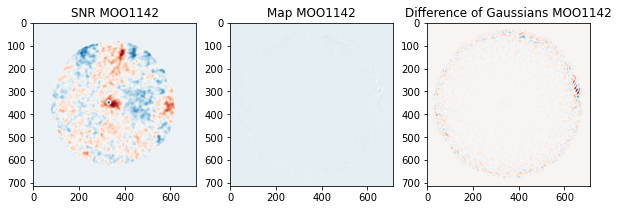

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
axs[0].imshow(img_snr_MOO1142,cmap="RdBu")
axs[0].set_title("SNR MOO1142")
axs[1].imshow(img_map_MOO1142,cmap="RdBu")
axs[1].set_title("Map MOO1142")
axs[2].imshow(result_MOO1142,cmap="RdBu")
#axs[2].contour(result_MOO1142[200:390,200:390],colors='k')
axs[2].set_title("Difference of Gaussians MOO1142")

Text(0.5, 1.0, 'Difference of Gaussians M0717')

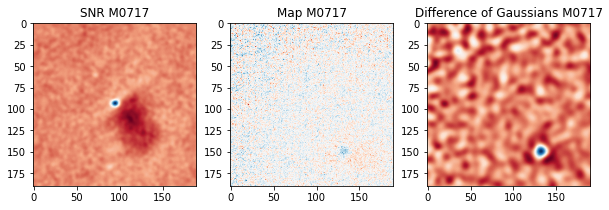

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
axs[0].imshow(img_snr_M0717[200:390,200:390],cmap="RdBu")
axs[0].set_title("SNR M0717")
axs[1].imshow(img_map_M0717[200:390,200:390],cmap="RdBu")
axs[1].set_title("Map M0717")
axs[2].imshow(result_M0717[200:390,200:390],cmap="RdBu")
#axs[2].contour(result_M0717[200:390,200:390],colors='k')
axs[2].set_title("Difference of Gaussians M0717")


Text(0.5, 1.0, 'Difference of Gaussians MOO1014')

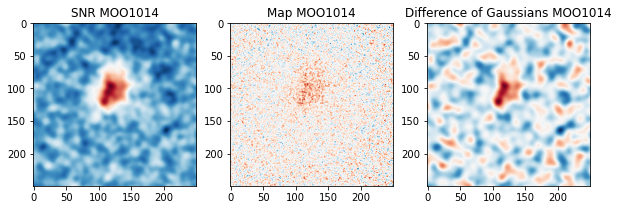

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
axs[0].imshow(img_snr_MOO1014[250:500,250:500],cmap="RdBu")
axs[0].set_title("SNR MOO1014")
axs[1].imshow(img_map_MOO1014[250:500,250:500],cmap="RdBu")
axs[1].set_title("Map MOO1014")
axs[2].imshow(result_MOO1014[250:500,250:500],cmap="RdBu")
#axs[2].contour(result_MOO1014[180:410,180:410],colors='k')
axs[2].set_title("Difference of Gaussians MOO1014")

Text(0.5, 1.0, 'Difference of Gaussians MOO1506')

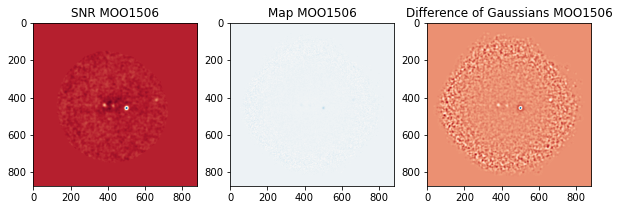

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
axs[0].imshow(img_snr_MOO1506,cmap="RdBu")
axs[0].set_title("SNR MOO1506")
axs[1].imshow(img_map_MOO1506,cmap="RdBu")
axs[1].set_title("Map MOO1506")
axs[2].imshow(result_MOO1506,cmap="RdBu")
#axs[2].contour(result_MOO1014[180:410,180:410],colors='k')
axs[2].set_title("Difference of Gaussians MOO1506")

In [32]:
theta1_arr=[7.0]
theta2_arr=[8.75,10,15,20,25,30,35,40,45,50]
cluster_list=[img_map_MOO1506]
cluster_list_names=["img_map_MOO1506"]
for k in range(len(cluster_list_names)):
    for i in theta1_arr:
        for j in theta2_arr:
            filename="diff_Gauss_"+cluster_list_names[k]+"_theta1_"+str(i)+"__theta2_"+str(j)
            result=diffOfGaussians(cluster_list[k],i,j)
            np.savetxt(filename,result)